# Assignment2 -Yumin Cao

# 1--Understand the dataset

In [1]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [2]:
import numpy as np
import pandas as pd

In [3]:
dir(data)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [4]:
print(data.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [5]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [6]:
X,y = data['data'],data['target']
print(X.shape,y.shape,y[y==1].shape,y[y==0].shape) # Know who is 0(Malignant), and who is 1(Benign)

(569, 30) (569,) (357,) (212,)


In [7]:
df = pd.DataFrame(data=np.c_[data['data'], data['target']], columns=list(data['feature_names']) + ['target'])

In [8]:
# change the target datatype to int rather than float
df['target'] = df['target'].astype(int)

In [9]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:
# count the number of malignant samples
df['target'].where(lambda x: x == 0).count()

212

In [11]:
# count the number of benign samples
df['target'].where(lambda x: x == 1).count()

357

# Question 1

## Q 1.1
### Answer:

### Meaning of 10 parameters of the cell nuclei:
- (Radius)The radius means the mean number of distance from center to points on the perimeter.
- (Perimeter)The perimeter means the length of the boundary, which is the total distance between the snake points.
- (Area)The area of the cell,which is the sum of interior pixels of the snake and one-half of the pixels in the perimeter.
- (Compactness)The compactness is calculated through perimeter^2 / area - 1.0, it gives a combined information of perimeter and area.
- (Smothness)The smoothness qualified by the local variation in radius lengths, it means whether a nuclear contour is like a circle.
- (Concavity)The concavity describes the severity of concave portions of the contour.
- (Concave points)The concave points means the number of concave portions of the contour.
- (Symmetry)The symmetry can see whether two parts are similar to each other, which measured by the length difference between major axis to cell boundary.
- (Fractal dimension)The fractal dimension describes how detail changes with the scale at which we measure. It shows the relationship between complexity and approximation.
- (Texture)The texture means the standard deviation of gray-scale values in the pixels.

### Reasons for using different statistical methods:
- Mean: Mean is the most commonly used method to calculate the central tendency and the average of the numeric data, especially it can reduce the effect of outliers in the dataset so that we can represent the data more accurately.
- Standard Error: Standard Error estimates the standard deviation of the parameter by calculating the standard deviation of the sampling distribution and divided by the square root of the sample size. The higher the value of standard error, the less representative of the sample mean for the "real" mean, the lower the value of standard error, the higher representative of the sample mean of the "real" mean. In this case, we can use the value of the standard error to measure how we can trust the sample mean of a particular parameter.
- Maximum: The extreme case of the parameter, in this case, we can measure how "severe" that a patient might be. We know that the extreme cases usually have connnection with malignant based on our daily knowledge.

##### The mean, standard error and maximum of parameters are used in classification here. The reason for using them is probably because these values can represent the situation of the health better, providing the overview of features, with sending a combined information of all cells.

## Q 1.2
Mean: radius(Malignant, Benign), texture (Malignant, Benign), perimeter (Malignant, Benign) ...
Standard Errror: radius(Malignant, Benign), texture (Malignant, Benign), perimeter (Malignant, Benign) ...
Maximum: radius(Malignant, Benign), texture (Malignant, Benign), perimeter (Malignant, Benign) ...

In [12]:
# need to install seaborn before using
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
mean = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
 'mean smoothness', 'mean compactness', 'mean concavity',
 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'target']
se = ['radius error', 'texture error', 'perimeter error', 'area error',
 'smoothness error', 'compactness error', 'concavity error',
 'concave points error', 'symmetry error', 'fractal dimension error', 'target']
worst = ['worst radius', 'worst texture', 'worst perimeter', 'worst area',
 'worst smoothness', 'worst compactness', 'worst concavity',
 'worst concave points', 'worst symmetry', 'worst fractal dimension', 'target']
mean_distribution = df.loc[:, mean].melt(['target'], var_name='cols',  value_name='vals')
se_distribution = df.loc[:, se].melt(['target'], var_name='cols',  value_name='vals')
worst_distribution = df.loc[:, worst].melt(['target'], var_name='cols',  value_name='vals')

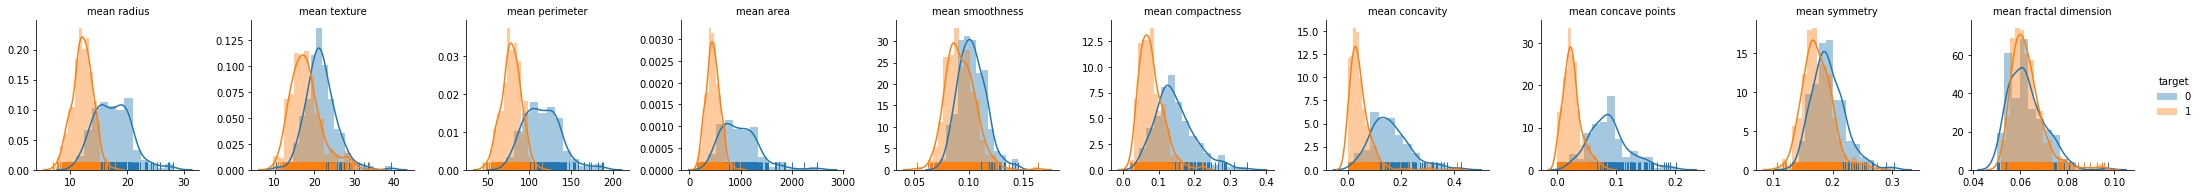

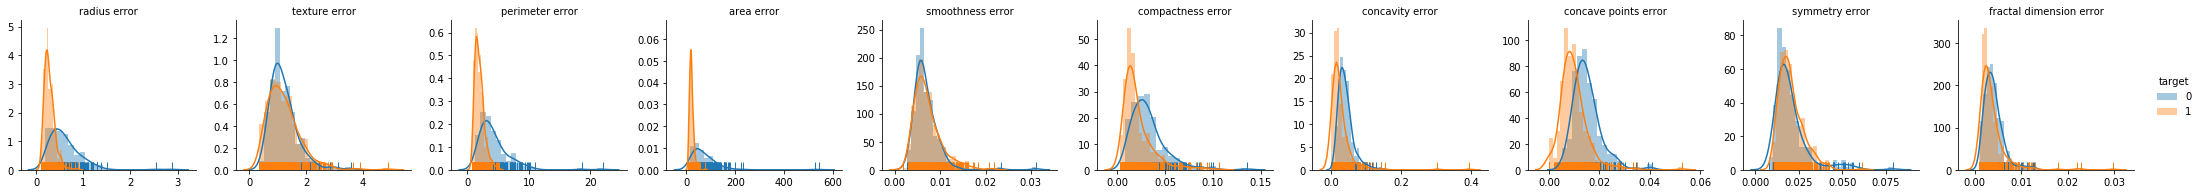

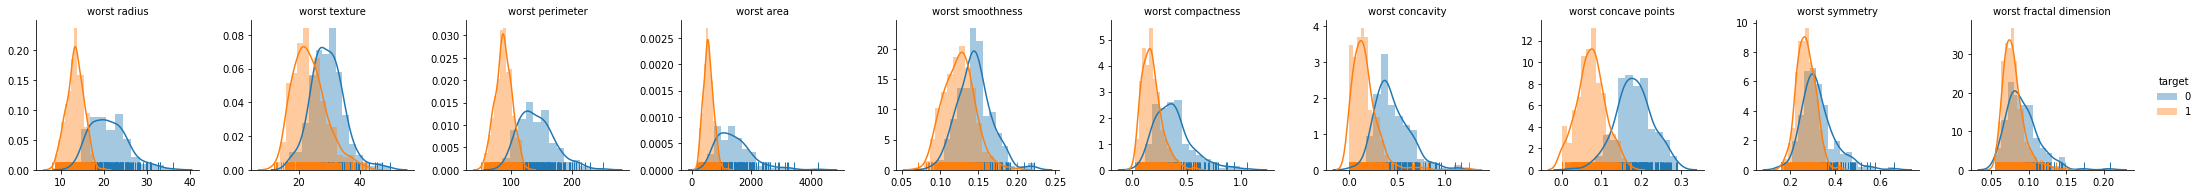

In [14]:
for distribution in [mean_distribution, se_distribution, worst_distribution]:
    fg = sns.FacetGrid(distribution, col='cols', hue='target', 
                           sharex=False, sharey=False)
    fg.map(sns.distplot, 'vals', rug=True)\
             .add_legend()\
             .set_titles("{col_name}")\
             .set_axis_labels('')
    plt.show()

    plt.clf()
    plt.close('all')

## Q 1.3

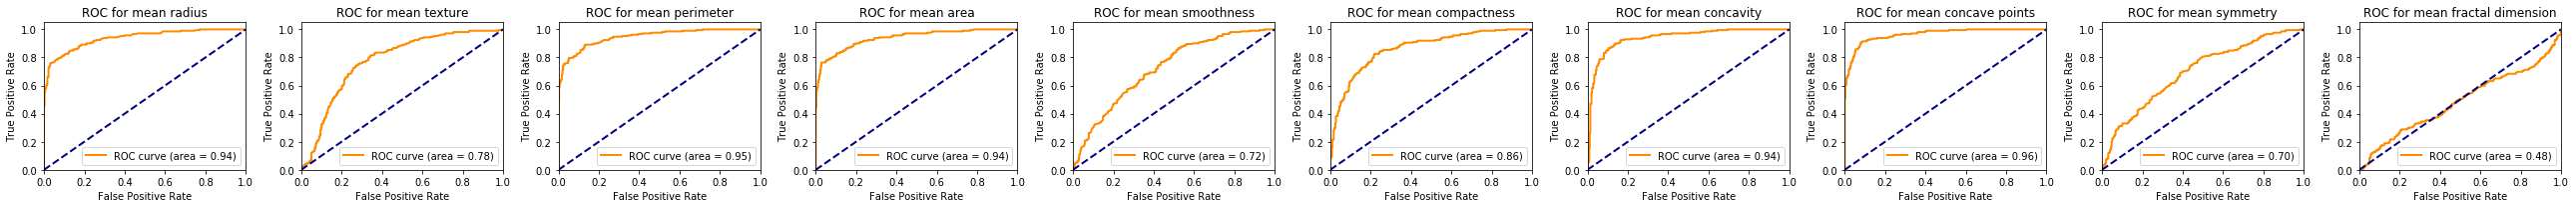

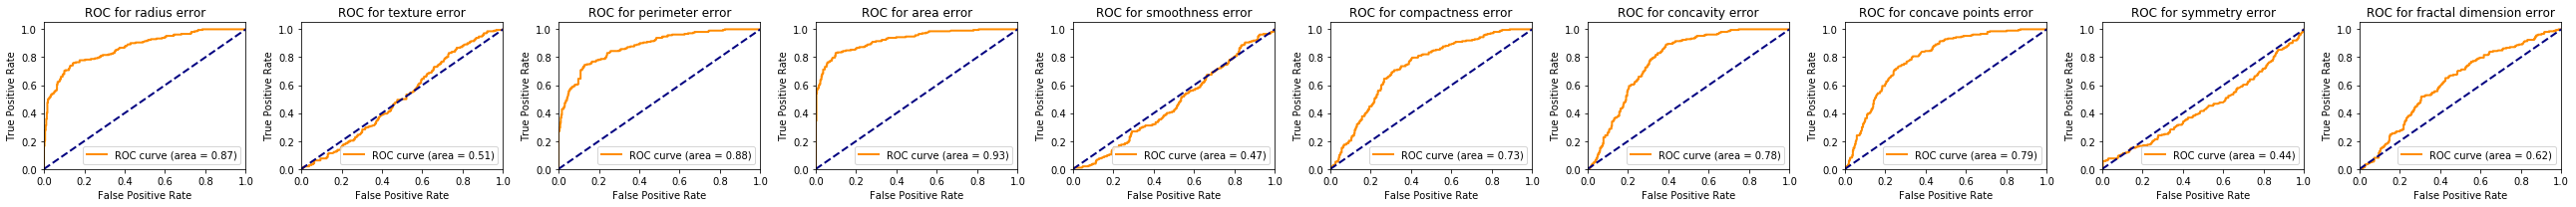

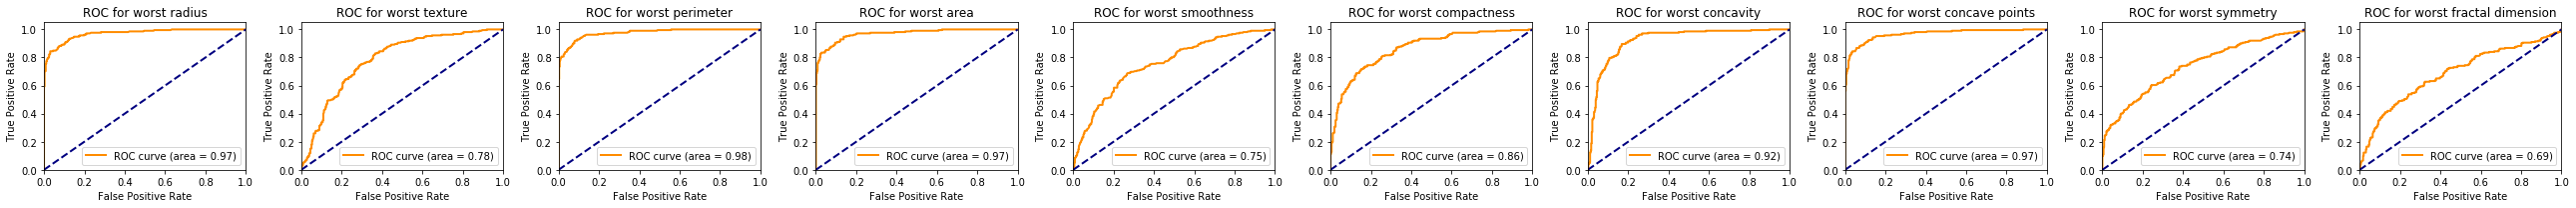

In [15]:
from sklearn.metrics import auc, roc_curve

categories =[['mean radius', 'mean texture', 'mean perimeter', 'mean area',
 'mean smoothness', 'mean compactness', 'mean concavity',
 'mean concave points', 'mean symmetry', 'mean fractal dimension'],
            ['radius error', 'texture error', 'perimeter error', 'area error',
 'smoothness error', 'compactness error', 'concavity error',
 'concave points error', 'symmetry error', 'fractal dimension error'],
            ['worst radius', 'worst texture', 'worst perimeter', 'worst area',
 'worst smoothness', 'worst compactness', 'worst concavity',
 'worst concave points', 'worst symmetry', 'worst fractal dimension']]

for i in range(3):
    # set up subplots
    fig, sub = plt.subplots(1,10, figsize=(36,3))
    for j in range(10):
        # calculate false positive rate, true positive rate and tresholds
        fpr, tpr, thresholds = roc_curve(df['target'], df[categories[i][j]], pos_label=0)
        # plot roc curve and calculate auc
        sub[j].plot(fpr, tpr, color='darkorange',
                 lw=2, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
        sub[j].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        sub[j].axis(xmin=0.0,xmax=1.0)
        sub[j].axis(ymin=0.0,ymax=1.05)
        sub[j].set_xlabel('False Positive Rate')
        sub[j].set_ylabel('True Positive Rate')
        sub[j].set_title('ROC for ' + categories[i][j])
        sub[j].legend(loc="lower right")
    fig.tight_layout()
    plt.show()   
    plt.close('all')

## Q 1.4
### Answer:
We can see from the above histograms and ROC graphs that the following features are promising:
- 'worse concave points' (ROC is smooth, AUC=0.97 and class distributions are clearly separated)
- 'worse area" (ROC is smooth, AUC=0.97 and class distributions are clearly separated)
- 'mean concave points' (ROC is smooth, AUC=0.96 and class distributions are clearly separated)
- 'worse concavity' (ROC is smooth, AUC=0.92 and class distributions are clearly separated)
- 'mean radius' (ROC is smooth, AUC=0.94 and class distributions are clearly separated)

## Q 1.5

In [16]:
dfs = [rows for _, rows in df.groupby('target')]
print(len(dfs[0]))
print(len(dfs[1]))
Malignant = dfs[0]
Benign = dfs[1]
Analysis_Point = {'average(mean value)':1/2*(Malignant.mean()+Benign.mean()),
                  'Malignant(mean value)':Malignant.mean(),
                  'Benign(mean value)':Benign.mean()}
# print(Malignant.mean())
# print(Benign.mean())
print('average:\n',Analysis_Point['average(mean value)'])
print('Malignant:\n',Analysis_Point['Malignant(mean value)'])
print('Benign:\n',Analysis_Point['Benign(mean value)'])

212
357
average:
 mean radius                 14.804677
mean texture                19.759834
mean perimeter              96.720392
mean area                  720.583306
mean smoothness              0.097688
mean compactness             0.112636
mean concavity               0.103416
mean concave points          0.056854
mean symmetry                0.183547
mean fractal dimension       0.062774
radius error                 0.446582
texture error                1.215647
perimeter error              3.162125
area error                  46.903777
smoothness error             0.006988
compactness error            0.026860
concavity error              0.033910
concave points error         0.012459
symmetry error               0.020528
fractal dimension error      0.003849
worst radius                17.257306
worst texture               26.416639
worst perimeter            114.188134
worst area                 990.592880
worst smoothness             0.134902
worst compactness            0.2

# 2--Train a decision tree classfier

# Question 2

## Q 2.1

In [17]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0,
                             criterion='gini',
                             max_depth=None,
                             min_samples_leaf=1,
                             min_samples_split=2,
                             min_weight_fraction_leaf=0.0,
                             max_features=None,
                             max_leaf_nodes=None, 
                             min_impurity_decrease=0.0, 
                             min_impurity_split=None,
                             class_weight=None)

### Answer:

Explanation:
- criterion: This is the function to measure the quality of a split, we choose 'gini' index for calculating the split scriterion.

- max_depth: The maximum depth of the tree. Since we can later fine tune this parameter, so that we can let the model choose the max_depth and then perform a grid search. The deeper the tree, the model will be more likely to be overfit, and the lower the depth, the model will more tend to be underfit.

- min_samples_split: The minimum number of samples required to split an internal node, we can choose 2 since we want the tree to be split on at least 2 samples.

- min_samples_leaf: The minimum number of samples required to be at a leaf node. This parameter is also used to control overfitting, so that we can choose 1 first and then perform a grid search for this parameter. The larger the value, the less likely the model will be overfitting, but it may be underfit the data.

- min_weight_fraction_leaf: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided. In our case, we can set this parameter to default value.

- max_features: The number of features to consider when looking for the best split. Since we use all the features, so that we set this parameter to default.

- random_state: It is the seed used by the random number generator, we set to 0.

- max_leaf_nodes: Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes. In our case we can set this parameter to default since we do not need to limit the number of leaf nodes.

- min_impurity_decrease: A node will be split if this split induces a decrease of the impurity greater than or equal to this value. We set this parameter to default to see if we need to fine tune later. Increase this value will result in a more general tree and reduce overfitting.

- min_impurity_split: Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf. We set this parameter to default, the effect of this parameter is the same as min_impurity_decrease.

- class_weight: Weights associated with classes in the form {class_label: weight}. If None, all classes are supposed to have weight one. In our case, we have a ratio of 212:357 for different classes, which is nearly balanced, so that we do not need to introduce class weight.


## Q 2.2
### Answer:

### scale?
- We usually do NOT need to scale the data if we use a tree-based method such as decision tree model, because the way how we calculate the split criterion. The following experiment show the same result despite with or without scaling. However, since we need to compare the decision tree model with SVM model so that we can scale the data to make sure consistency.

### class size?
- In our case the class size is a little bit unbalanced, a ratio of 212:357 for malignant and benign. But it wont be a problem since it was not an extreme case such as a ratio of 99:1 for positive and negative classes. However, we can introduce resampling or class weight to mitigate the effect of imbalanced data. Since our sameple size is small, so that we can use class weight method in our case. We can see from the following experiment that the class weight wont improve the prediction much.

In [18]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# split training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, 'mean radius':'worst fractal dimension'],df['target'],test_size=0.3, random_state=0)

# make compare with SVM to make sure consistency
steps = [('scaler', StandardScaler()), ('decision_tree_classifier', clf)]
pipeline = Pipeline(steps)

clf_without_scale = DecisionTreeClassifier(random_state=0,
                             criterion='gini',
                             max_depth=None,
                             min_samples_leaf=1,
                             min_samples_split=2,
                             min_weight_fraction_leaf=0.0,
                             max_features=None,
                             max_leaf_nodes=None, 
                             min_impurity_decrease=0.0, 
                             min_impurity_split=None,
                             class_weight=None)

# First scale the data, then build the decision tree
# steps = [('scaler', StandardScaler()), ('decision_tree_classifier', clf)]
clf_with_scale = pipeline

# training decision tree using training dataset
clf_without_scale.fit(X_train, y_train)
clf_with_scale.fit(X_train, y_train)

# predict test dataset
y_pred_without_scale = clf_without_scale.predict(X_test)
y_pred_with_scale = clf_with_scale.predict(X_test)
print("Prediction report without scale:")
print(classification_report(y_test, y_pred_without_scale, target_names=data.target_names))
print("Prediction report with scale:")
print(classification_report(y_test, y_pred_with_scale, target_names=data.target_names))

Prediction report without scale:
              precision    recall  f1-score   support

   malignant       0.84      0.94      0.89        63
      benign       0.96      0.90      0.93       108

    accuracy                           0.91       171
   macro avg       0.90      0.92      0.91       171
weighted avg       0.92      0.91      0.91       171

Prediction report with scale:
              precision    recall  f1-score   support

   malignant       0.84      0.94      0.89        63
      benign       0.96      0.90      0.93       108

    accuracy                           0.91       171
   macro avg       0.90      0.92      0.91       171
weighted avg       0.92      0.91      0.91       171



In [19]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# split training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, 'mean radius':'worst fractal dimension'],df['target'],test_size=0.3, random_state=0)

clf_without_class_weight = DecisionTreeClassifier(random_state=0,
                             criterion='gini',
                             max_depth=None,
                             min_samples_leaf=1,
                             min_samples_split=2,
                             min_weight_fraction_leaf=0.0,
                             max_features=None,
                             max_leaf_nodes=None, 
                             min_impurity_decrease=0.0, 
                             min_impurity_split=None,
                             class_weight=None)

clf_with_class_weight = DecisionTreeClassifier(random_state=0,
                             criterion='gini',
                             max_depth=None,
                             min_samples_leaf=1,
                             min_samples_split=2,
                             min_weight_fraction_leaf=0.0,
                             max_features=None,
                             max_leaf_nodes=None, 
                             min_impurity_decrease=0.0, 
                             min_impurity_split=None,
                             class_weight={1: 212, 0: 357})

# training decision tree using training dataset
clf_without_class_weight.fit(X_train, y_train)
clf_with_class_weight.fit(X_train, y_train)

# predict test dataset
y_pred_without_class_weight = clf_without_class_weight.predict(X_test)
y_pred_with_class_weight = clf_with_class_weight.predict(X_test)
print("Prediction report without class weight:")
print(classification_report(y_test, y_pred_without_class_weight, target_names=data.target_names))
print("Prediction report with class weight:")
print(classification_report(y_test, y_pred_with_class_weight, target_names=data.target_names))

Prediction report without class weight:
              precision    recall  f1-score   support

   malignant       0.84      0.94      0.89        63
      benign       0.96      0.90      0.93       108

    accuracy                           0.91       171
   macro avg       0.90      0.92      0.91       171
weighted avg       0.92      0.91      0.91       171

Prediction report with class weight:
              precision    recall  f1-score   support

   malignant       0.81      0.97      0.88        63
      benign       0.98      0.87      0.92       108

    accuracy                           0.91       171
   macro avg       0.90      0.92      0.90       171
weighted avg       0.92      0.91      0.91       171



## Q 2.3
### Answer:

- First we can construct a fully grown decision tree to see the depth. Then we can perform a grid search for the maximum depth from 1 to the depth of fully grown decision tree. 
- The min_samples_leaf can be searched based on empirical value from 1 to 20 [1].

[1] Rafael Gomes Mantovani, Tomáš Horváth, Ricardo Cerri, Sylvio Barbon Junior, Joaquin Vanschoren, André Carlos Ponce de Leon Ferreira de Carvalho, "An empirical study on hyperparameter tuning of decision trees": https://arxiv.org/abs/1812.02207

In [20]:
# construct a fully grown decision tree
clf = DecisionTreeClassifier(random_state=0,
                             criterion='gini',
                             max_depth=None,
                             min_samples_leaf=1,
                             min_samples_split=2,
                             min_weight_fraction_leaf=0.0,
                             max_features=None,
                             max_leaf_nodes=None, 
                             min_impurity_decrease=0.0, 
                             min_impurity_split=None,
                             class_weight=None)
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)
print("Decision Tree Depth: ", clf.get_depth())

Decision Tree Depth:  7


In [21]:
from sklearn.model_selection import GridSearchCV

# perform a grid search
parameters = {'decision_tree_classifier__max_depth': list(range(1,7)), 'decision_tree_classifier__min_samples_leaf': list(range(1, 20))}
gs_clf = GridSearchCV(pipeline, parameters, cv=5)
gs_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('decision_tree_classifier',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                

In [22]:
# print the best parameter value from grid search
print(gs_clf.best_params_)

{'decision_tree_classifier__max_depth': 4, 'decision_tree_classifier__min_samples_leaf': 3}


In [23]:
y_true, y_pred = y_test, gs_clf.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



# Q3

## Q 3.1
### Answer:

- From the following results, we can see that out of 59 + 4 = 63 Malignant test cases, our decision tree classifier successfully identified 59 cases of cancer, but failed to identified the other 4 cases, so that the recall for classifying cancer is 59/(59+4) = 94%, which means we still have 6% chance of failling to detect a sample with cancer.

- We can see from the result that this decision tree classifier is very accurate for identifying Benign tumour, since we got 97% recall and 96% precision. However, we only got 94% recall and 95% precision for identifying Malignant tumour, which is the weakness of this classifier.

In [24]:
from sklearn.metrics import confusion_matrix

# construct the final decision tree model
clf = DecisionTreeClassifier(random_state=0,
                             criterion='gini',
                             max_depth=4,
                             min_samples_leaf=3,
                             min_samples_split=2,
                             min_weight_fraction_leaf=0.0,
                             max_features=None,
                             max_leaf_nodes=None, 
                             min_impurity_decrease=0.0, 
                             min_impurity_split=None,
                             class_weight=None)
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)


In [25]:
tn, fp, fn, tp = confusion_matrix(y_test, clf_pred).ravel()
print('Case #1:'+' (# we should CHOOSE case1 and IGNORE case2 based on our assignment.)')
print('The prediction of 1 (Positive) represents Benign')
print('The prediction of 0 (Negative) represents Malignant')
print('The confusion matrix is:')
print('n = ' + str(sum([tn, fp, fn, tp])))
print('                                                        Actual Values')
print()
print('                                          Positive (Benign)               Negative (Malignant)')
print('                   Positive    (Benign)         ' + str(tp) + ' (TP)' + '                               ' + str(fp) + ' (FP)')
print('Predicted Values')
print('                   Negative (Malignant)           ' + str(fn) + ' (FN)' +'                              ' + str(tn) + ' (TN)')

print()
print()
print('Case #2:')
print('The prediction of 0 (Positive) represents Benign')
print('The prediction of 1 (Negative) represents Malignant')
print('The confusion matrix is:')
print('n = ' + str(sum([tn, fp, fn, tp])))
print('                                                        Actual Values')
print()
print('                                          Positive (Malignant)               Negative (Benign)')
print('                   Positive (Malignant)         ' + str(tn) + ' (TP)' + '                                ' + str(fn) + ' (FP)')
print('Predicted Values') 
print('                   Negative    (Benign)          ' + str(fp) + ' (FN)' +'                              ' + str(tp) + ' (TN)')

Case #1: (# we should CHOOSE case1 and IGNORE case2 based on our assignment.)
The prediction of 1 (Positive) represents Benign
The prediction of 0 (Negative) represents Malignant
The confusion matrix is:
n = 171
                                                        Actual Values

                                          Positive (Benign)               Negative (Malignant)
                   Positive    (Benign)         105 (TP)                               4 (FP)
Predicted Values
                   Negative (Malignant)           3 (FN)                              59 (TN)


Case #2:
The prediction of 0 (Positive) represents Benign
The prediction of 1 (Negative) represents Malignant
The confusion matrix is:
n = 171
                                                        Actual Values

                                          Positive (Malignant)               Negative (Benign)
                   Positive (Malignant)         59 (TP)                                3 (FP)
Predicted Va

In [26]:
# precision = tp / (tp + fp)
# recall = tp / (tp + fn)
print(classification_report(y_test, clf_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



## Q 3.2
### Answer:

- We can see from the following graph that the depth of the decision tree is 4, and there are 10 nodes. The first node is "worse concave points" 
  * The first entry is a conditional test: if the value is less or equal to 0.142, it will go to the left branch, otherwise it will go to the right branch.
  * The second entry is gini index, which measures the impurity of the nodes or leaf. The larger the value, the more impure of the node or leaf.
  * The third entry means how many samples needs to be seperated, in this case, there are 398 samples.
  * The forth entry means how many samples fall into each class, in this case, there are 149 calss 0 samples and 249 belongs to class 1.
  
- Yes, all the 5 candidate features are included in the decision tree nodes.


[Text(1088.1000000000001, 1761.2640000000001, 'worst concave points <= 0.142\ngini = 0.468\nsamples = 398\nvalue = [149, 249]'),
 Text(725.4000000000001, 1369.872, 'worst area <= 952.9\ngini = 0.147\nsamples = 263\nvalue = [21, 242]'),
 Text(446.40000000000003, 978.48, 'area error <= 35.26\ngini = 0.077\nsamples = 250\nvalue = [10, 240]'),
 Text(223.20000000000002, 587.088, 'worst concave points <= 0.136\ngini = 0.034\nsamples = 232\nvalue = [4, 228]'),
 Text(111.60000000000001, 195.69600000000014, 'gini = 0.018\nsamples = 226\nvalue = [2, 224]'),
 Text(334.8, 195.69600000000014, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(669.6, 587.088, 'mean texture <= 23.86\ngini = 0.444\nsamples = 18\nvalue = [6, 12]'),
 Text(558.0, 195.69600000000014, 'gini = 0.32\nsamples = 15\nvalue = [3, 12]'),
 Text(781.2, 195.69600000000014, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(1004.4000000000001, 978.48, 'worst concavity <= 0.18\ngini = 0.26\nsamples = 13\nvalue = [11, 2]'),
 Text(892.8

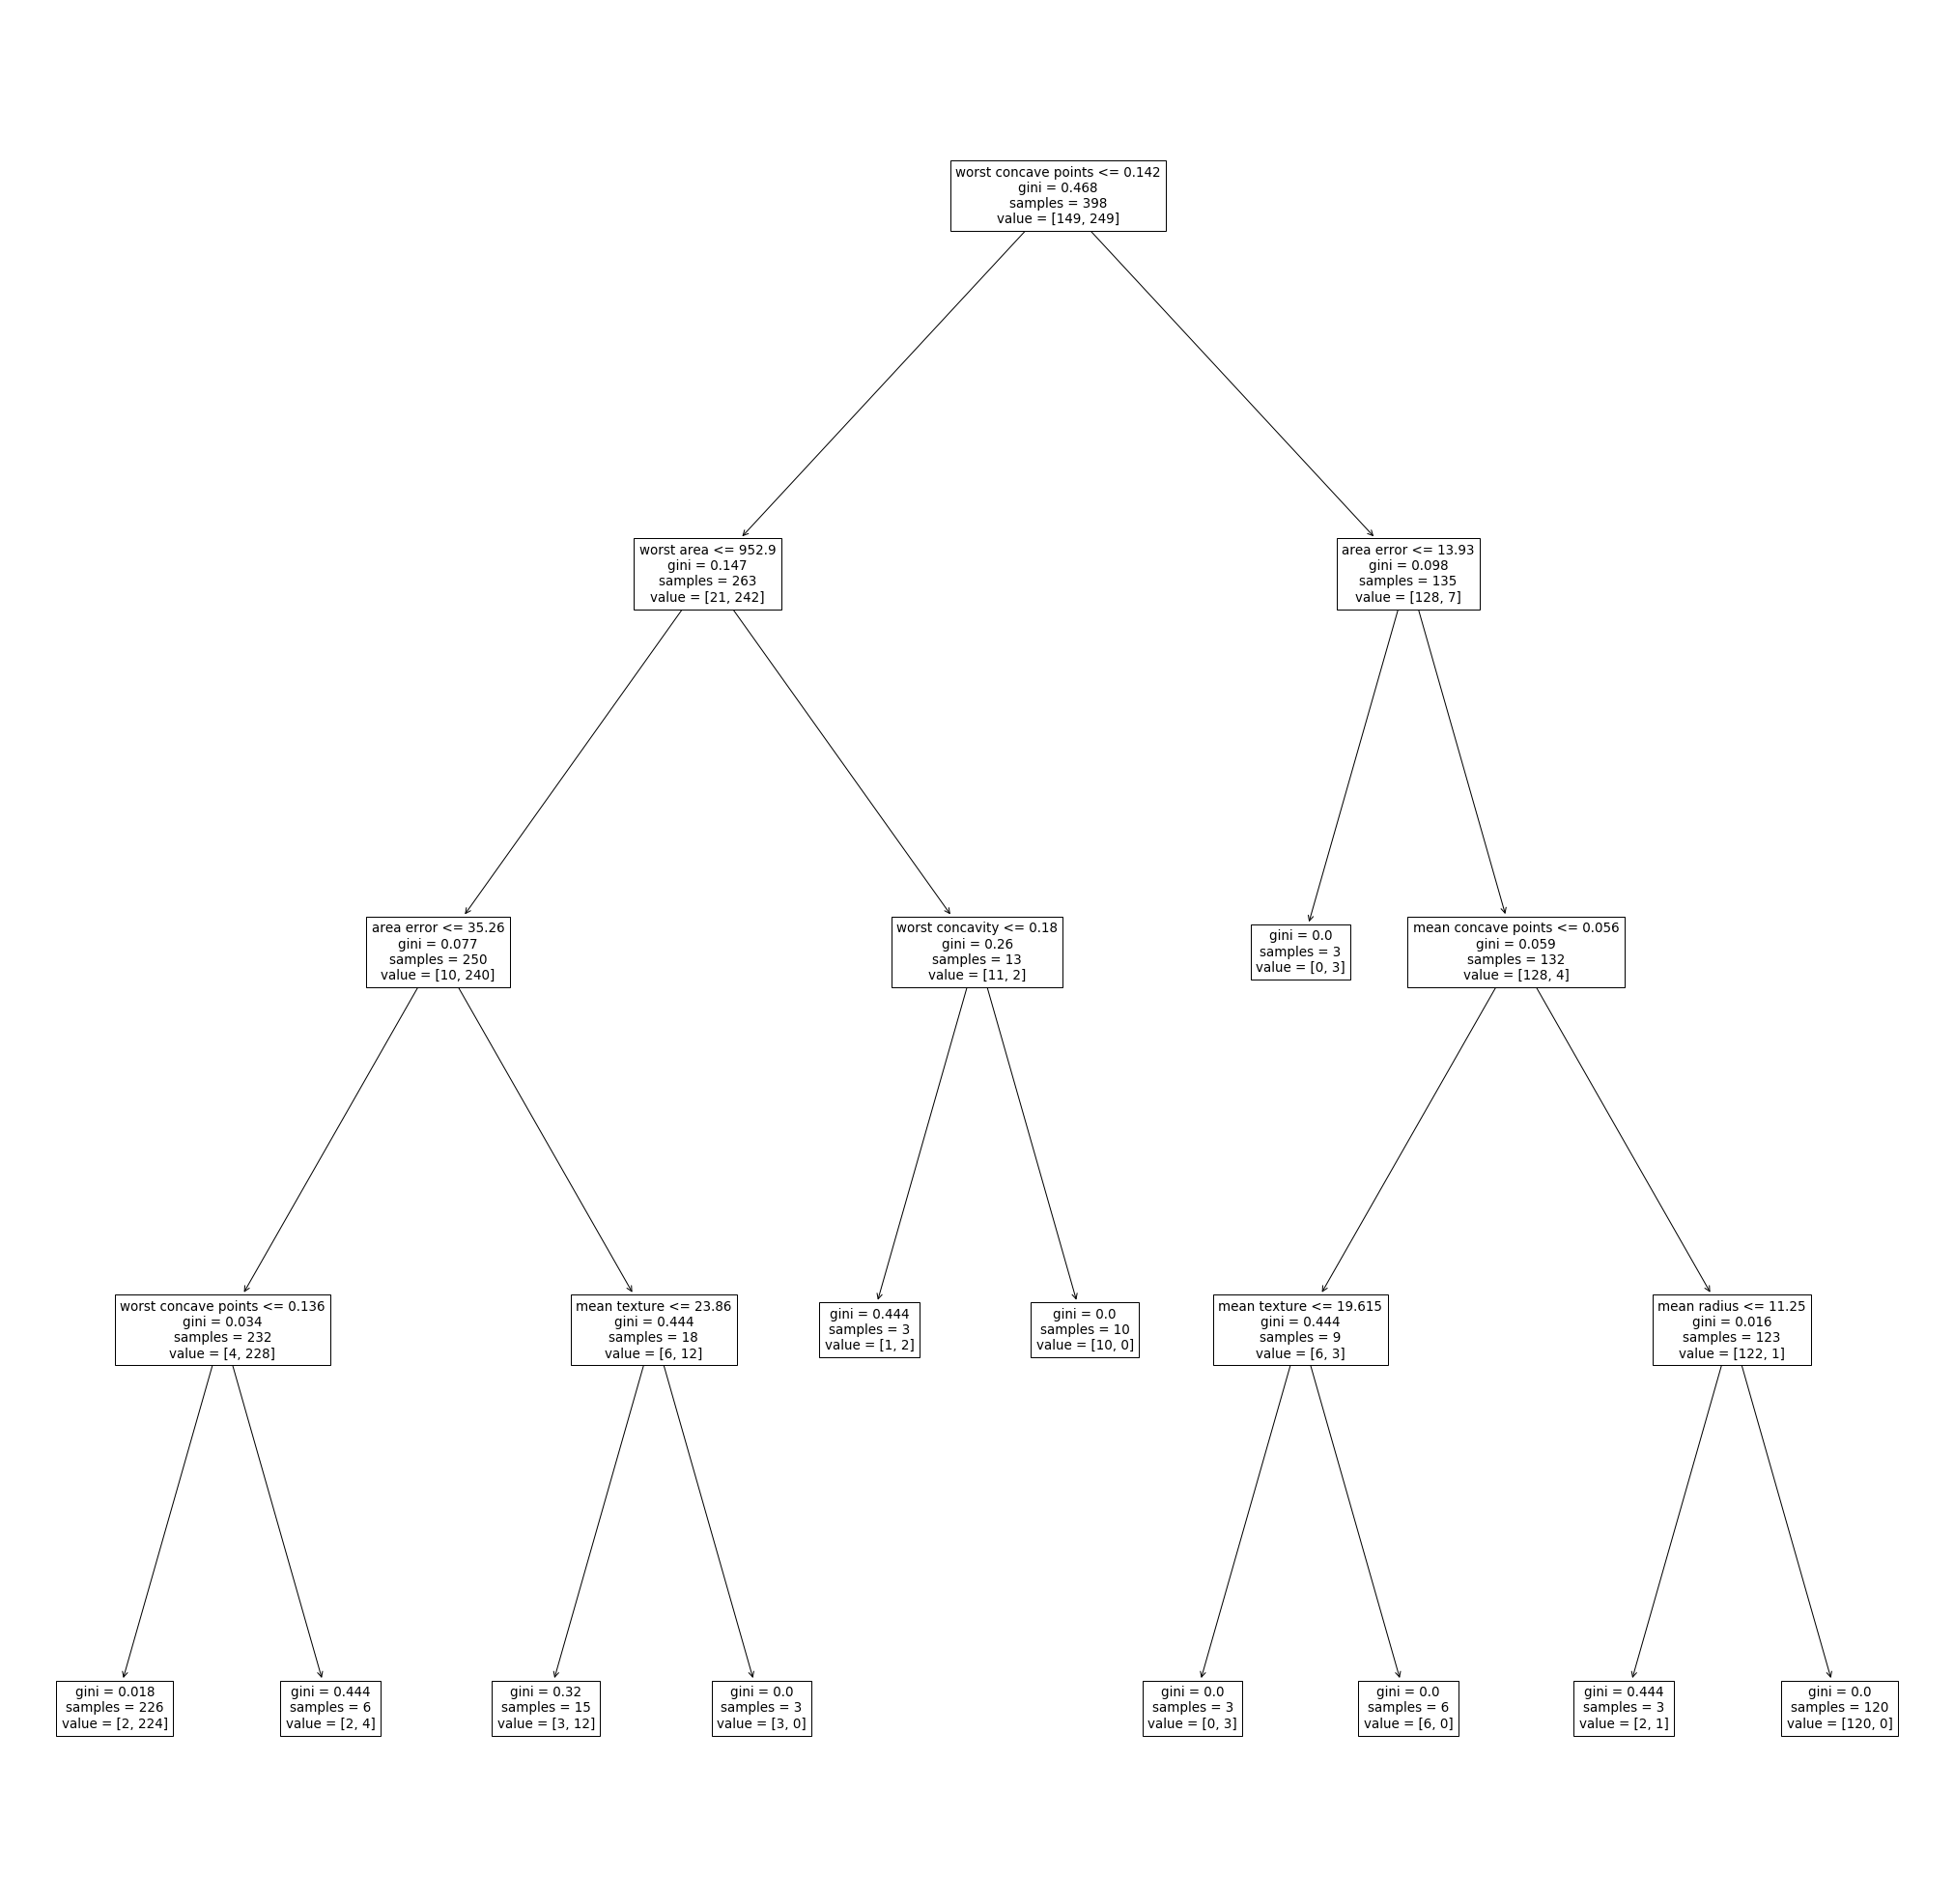

In [27]:
from sklearn import tree
plt.figure(figsize=(36,36))
tree.plot_tree(clf, feature_names=data.feature_names)

## Q 3.3

### select 5 most important features

In [28]:
clf.feature_importances_

array([0.00377399, 0.04177806, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.0102927 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.0513779 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.09319857, 0.        ,
       0.        , 0.01190258, 0.78767619, 0.        , 0.        ])

In [29]:
top_features = list(map(lambda x: x[1], 
         sorted(
             list(
                 zip(clf.feature_importances_, data.feature_names)), key=lambda x: x[0], reverse=True)[:5]))
top_features

['worst concave points',
 'worst area',
 'area error',
 'mean texture',
 'worst concavity']

In [30]:
from itertools import combinations
from sklearn.tree import DecisionTreeClassifier
top_features = ['worst concave points',
 'worst area',
 'area error',
 'mean texture',
 'worst concavity']
list(combinations(top_features, 2))

[('worst concave points', 'worst area'),
 ('worst concave points', 'area error'),
 ('worst concave points', 'mean texture'),
 ('worst concave points', 'worst concavity'),
 ('worst area', 'area error'),
 ('worst area', 'mean texture'),
 ('worst area', 'worst concavity'),
 ('area error', 'mean texture'),
 ('area error', 'worst concavity'),
 ('mean texture', 'worst concavity')]

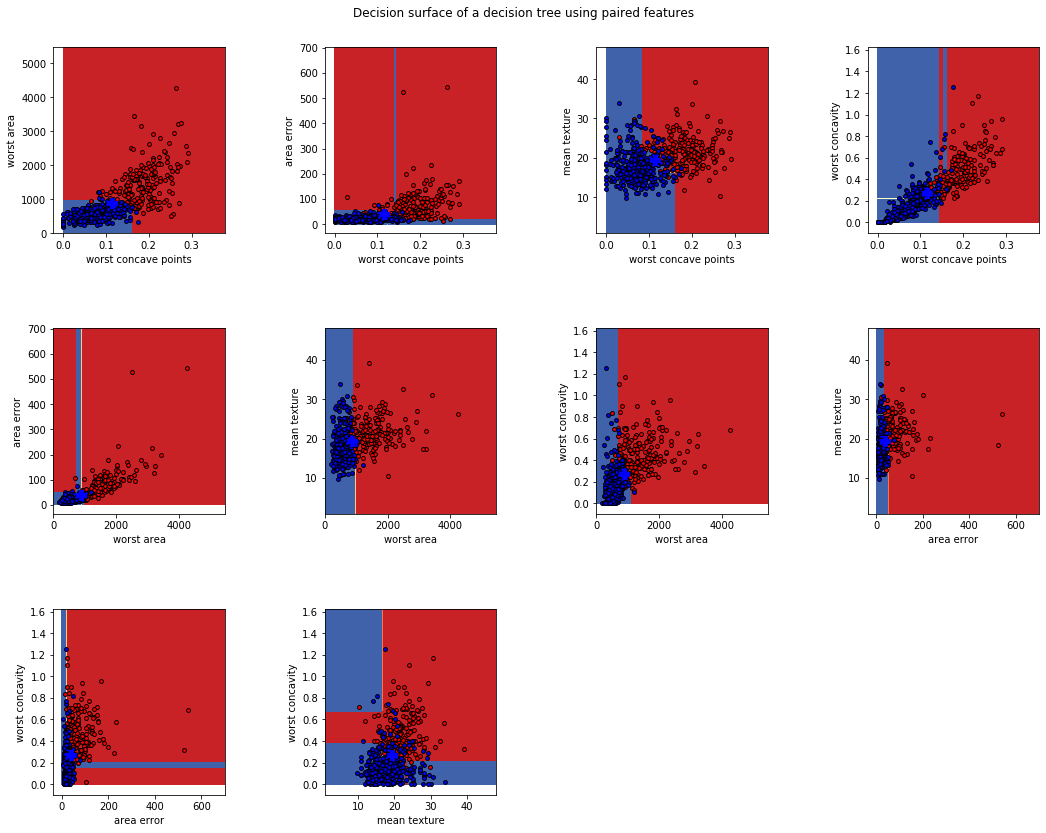

In [31]:
# Reference: https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html

plt.figure(figsize=(16,16))
for pairidx, pair in enumerate(list(combinations(top_features, 2))):
    # We only take the two corresponding features
    X = df.loc[:, pair]
    y = df.target

    # Train: already trained a clf model
#     clf = DecisionTreeClassifier().fit(X, y)
    clf.fit(X,y)

    # Plot the decision boundary
    plt.subplot(4, 4, pairidx + 1)

    # calculate the axis margins
    x_min, x_max = X.loc[:, pair[0]].min(), X.loc[:, pair[0]].max()
    y_min, y_max = X.loc[:, pair[1]].min(), X.loc[:, pair[1]].max()
    x_min, x_max = 0 if x_min - (x_max-x_min) * 0.3 < 0 else x_min - (x_max-x_min) * 0.3, x_max + (x_max-x_min) * 0.3
    y_min, y_max = 0 if y_min - (y_max-y_min) * 0.3 < 0 else y_min - (y_max-y_min) * 0.3, y_max + (y_max-y_min) * 0.3
    xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max - x_min)/600),
                         np.arange(y_min, y_max, (y_max - y_min)/600))

    plt.tight_layout(pad=6)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(pair[0])
    plt.ylabel(pair[1])

    # Plot the training points
    for i, color in zip(range(2), "rb"):
        idx = list(np.where(y == i)[0])
        plt.scatter(X.loc[idx, pair[0]], X.loc[idx, pair[1]], c=color, label=pair[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
    
    # calculate analysis point and plot
    plt.plot([X.loc[:, pair[0]].mean()], [X.loc[:, pair[1]].mean()], marker='P', markersize=10, color="blue")

plt.suptitle("Decision surface of a decision tree using paired features")
# plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
# plt.tight_layout()

plt.show()

## Q 3.4
### Answer:

- We can see from the graph that decision tree models the boundary using a stair case pattern.
- Although these features are the most important features, but if two of them combined, the situation will change. Some of the data points are not clearly separable in some feature combinations or feature space, so that few 2D scatterplots with only one class shown as prediction contour.

# Q 4

## Q 4.1

In [32]:
from sklearn.svm import SVC
clf = SVC(C=1.0, 
          kernel='rbf',
          gamma='scale', 
          tol=0.001, 
          class_weight=None, 
          max_iter=-1)

### Answer:

Explanation:

- C: This is the penalty parameter of the error term or regularization parameter. The higher the value, the more penalty will be added for misclassification, so that the model will try harder to separate the data, which may result in overfitting. We can set this parameter to default where C=1.0 and perform grid search later.

- kernel: We use radial basis kernel in our case.

- gamma: This parameter can be used for non-linear hyperplanes. The higher the value, the model try harder to classify the training dataset, so that may result in overfitting. We can set this to default where gramma='scale' and fine tune later.

- tol: This is the tolerance for stopping criterion, which means the model tolerates 1 mistake in 1000 cases. We can set this to default.

- class_weight: In our case, the dataset is nearly balanced, so that we do not need to add class weight.

- max_iter: This parameter sets hard limits for iterations within solver. We can set this to default since we do not have a very large training dataset.

## Q 4.2
### Answer:

- The data needs to be scaled for SVM classification because we can see that the range of different features varies significantly, if we do not scale the data, the data points will live in a very small portion of the feature space, and make it harder for SVM to build a classification boundary. In the following experiment, we can see that after scaling the data, the overall accuracy boosted from 0.92 to 0.98.

- Different class sizes in our case is not problem because we have a nearly balanced dataset, and adding class weights may emphasize one class too much and reduce the overall accuracy. However, if we want to identify one class with higher precision or recall than the other class, we can add class weight.

In [33]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# split training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, 'mean radius':'worst fractal dimension'],df['target'],test_size=0.3, random_state=0)

# build a svc without scaling the data
clf_without_scale = SVC(C=1.0, 
                      kernel='rbf',
                      gamma='scale', 
                      tol=0.001, 
                      class_weight=None, 
                      max_iter=-1)

# First scale the data, then build svc
steps = [('scaler', StandardScaler()), ('svm', clf)]
clf_with_scale = Pipeline(steps)

# training svc using training dataset
clf_without_scale.fit(X_train, y_train)
clf_with_scale.fit(X_train, y_train)

# predict test dataset
y_pred_without_scale = clf_without_scale.predict(X_test)
y_pred_with_scale = clf_with_scale.predict(X_test)
print("Prediction report without scale:")
print(classification_report(y_test, y_pred_without_scale, target_names=data.target_names))
print("Prediction report with scale:")
print(classification_report(y_test, y_pred_with_scale, target_names=data.target_names))

Prediction report without scale:
              precision    recall  f1-score   support

   malignant       0.98      0.81      0.89        63
      benign       0.90      0.99      0.94       108

    accuracy                           0.92       171
   macro avg       0.94      0.90      0.91       171
weighted avg       0.93      0.92      0.92       171

Prediction report with scale:
              precision    recall  f1-score   support

   malignant       0.98      0.95      0.97        63
      benign       0.97      0.99      0.98       108

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [34]:
clf_without_class_weight = SVC(C=1.0, 
                              kernel='rbf',
                              gamma='scale', 
                              tol=0.001, 
                              class_weight=None, 
                              max_iter=-1)

# First scale the data, then build the svm
steps = [('scaler', StandardScaler()), ('svm_without_csw', clf_without_class_weight)]
clf_without_clw = Pipeline(steps)

clf_with_class_weight = SVC(C=1.0, 
                      kernel='rbf',
                      gamma='scale', 
                      tol=0.001, 
                      class_weight={1: 212, 0: 357}, 
                      max_iter=-1)

# First scale the data, then build the svm
steps = [('scaler', StandardScaler()), ('svm_with_csw', clf_with_class_weight)]
clf_with_clw = Pipeline(steps)

# training decision tree using training dataset
clf_without_clw.fit(X_train, y_train)
clf_with_clw.fit(X_train, y_train)

# predict test dataset
y_pred_without_clw = clf_without_clw.predict(X_test)
y_pred_with_clw = clf_with_clw.predict(X_test)
print("Prediction report without class weight:")
print(classification_report(y_test, y_pred_without_clw, target_names=data.target_names))
print("Prediction report with class weight:")
print(classification_report(y_test, y_pred_with_clw, target_names=data.target_names))

Prediction report without class weight:
              precision    recall  f1-score   support

   malignant       0.98      0.95      0.97        63
      benign       0.97      0.99      0.98       108

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

Prediction report with class weight:
              precision    recall  f1-score   support

   malignant       0.93      1.00      0.96        63
      benign       1.00      0.95      0.98       108

    accuracy                           0.97       171
   macro avg       0.96      0.98      0.97       171
weighted avg       0.97      0.97      0.97       171



## 4.3
### Answer:

- Tunning parameter C: This is the penalty parameter of the error term or regularization parameter. The higher the value, the more penalty will be added for misclassification, so that the model will try harder to separate the data, which may result in overfitting. We can search this parameter based on empirical values [0.01, 0.1, 1, 10, 100, 1000].

- Tunning gamma: This parameter can be used for non-linear hyperplanes. The higher the value, the model try harder to classify the training dataset, so that may result in overfitting. We can search this parameter based on empirical values [0.001, 0.01, 0.1, 1, 10, 100, 1000, 'scale', 'auto'].

- After performing the grid search, we can see that we have achieved 0.99 overall test accuracy with 'C' equals 10 and 'gamma' equals 0.01.

In [35]:
from sklearn.model_selection import GridSearchCV

# split training data and testing data with a ratio of 7:3
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, 'mean radius':'worst fractal dimension'],df['target'],test_size=0.3, random_state=0)

# build the svm
clf = SVC(C=1.0, 
          kernel='rbf',
          gamma='scale', 
          tol=0.001, 
          class_weight=None, 
          max_iter=-1)

# build the pipeline
steps = [('scaler', StandardScaler()), ('svm', clf)]
pipeline = Pipeline(steps)

# perform a grid search
parameters = {'svm__C': [0.01, 0.1, 1, 10, 100, 1000], 'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 'scale', 'auto']}
gs_clf = GridSearchCV(pipeline, parameters, cv=5)
gs_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('svm',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001

In [36]:
# print the best parameter value from grid search
print(gs_clf.best_params_)

{'svm__C': 10, 'svm__gamma': 0.01}


In [37]:
y_true, y_pred = y_test, gs_clf.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        63
           1       0.99      0.99      0.99       108

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



# Q 5

## Q 5.1

### Answer:

- From the following results, we can see that out of 63 Malignant test cases, our svm classifier successfully identified 62 cases of cancer, but failed to identified the other 1 case, so that the recall for classifying cancer is 62/(62+1) = 99%, which means we have 1% chance of failling to detect a sample with cancer.

- We can see from the result that this svm classifier is very accurate for identifying both Benign and Malignant tumour, since we got high precision and recall score for both classes.

In [38]:
from sklearn.metrics import confusion_matrix

# construct the final svm tree model
clf = SVC(C=10, 
          kernel='rbf',
          gamma=0.01, 
          tol=0.001, 
          class_weight=None, 
          max_iter=-1)

# build the pipeline
steps = [('scaler', StandardScaler()), ('svm', clf)]
pipeline = Pipeline(steps)

# fit the training dataset
pipeline.fit(X_train, y_train)

# predict the test set
clf_pred = pipeline.predict(X_test)

# get the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, clf_pred).ravel()
print('Case #1:','(we should CHOOSE case1 and IGNORE case2 based on our assignment.')
print('The prediction of 1 (Positive) represents Benign')
print('The prediction of 0 (Negative) represents Malignant')
print('The confusion matrix is:')
print('n = ' + str(sum([tn, fp, fn, tp])))
print('                                                        Actual Values')
print()
print('                                          Positive (Benign)               Negative (Malignant)')
print('                   Positive    (Benign)         ' + str(tp) + ' (TP)' + '                               ' + str(fp) + ' (FP)')
print('Predicted Values')
print('                   Negative (Malignant)           ' + str(fn) + ' (FN)' +'                              ' + str(tn) + ' (TN)')

print()
print()
print('Case #2:')
print('The prediction of 0 (Positive) represents Benign')
print('The prediction of 1 (Negative) represents Malignant')
print('The confusion matrix is:')
print('n = ' + str(sum([tn, fp, fn, tp])))
print('                                                        Actual Values')
print()
print('                                          Positive (Malignant)               Negative (Benign)')
print('                   Positive (Malignant)         ' + str(tn) + ' (TP)' + '                                ' + str(fn) + ' (FP)')
print('Predicted Values') 
print('                   Negative    (Benign)          ' + str(fp) + ' (FN)' +'                              ' + str(tp) + ' (TN)')

Case #1: (we should CHOOSE case1 and IGNORE case2 based on our assignment.
The prediction of 1 (Positive) represents Benign
The prediction of 0 (Negative) represents Malignant
The confusion matrix is:
n = 171
                                                        Actual Values

                                          Positive (Benign)               Negative (Malignant)
                   Positive    (Benign)         107 (TP)                               1 (FP)
Predicted Values
                   Negative (Malignant)           1 (FN)                              62 (TN)


Case #2:
The prediction of 0 (Positive) represents Benign
The prediction of 1 (Negative) represents Malignant
The confusion matrix is:
n = 171
                                                        Actual Values

                                          Positive (Malignant)               Negative (Benign)
                   Positive (Malignant)         62 (TP)                                1 (FP)
Predicted Value

In [39]:
# precision = tp / (tp + fp)
# recall = tp / (tp + fn)
print(classification_report(y_test, clf_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        63
           1       0.99      0.99      0.99       108

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



## 5.2

- Since we need to plot the support vectors and compare svm with decision tree, so that we do not scale the data.

In [40]:
from itertools import combinations

top_features = ['worst concave points',
 'worst area',
 'area error',
 'mean texture',
 'worst concavity']
list(combinations(top_features, 2))

[('worst concave points', 'worst area'),
 ('worst concave points', 'area error'),
 ('worst concave points', 'mean texture'),
 ('worst concave points', 'worst concavity'),
 ('worst area', 'area error'),
 ('worst area', 'mean texture'),
 ('worst area', 'worst concavity'),
 ('area error', 'mean texture'),
 ('area error', 'worst concavity'),
 ('mean texture', 'worst concavity')]

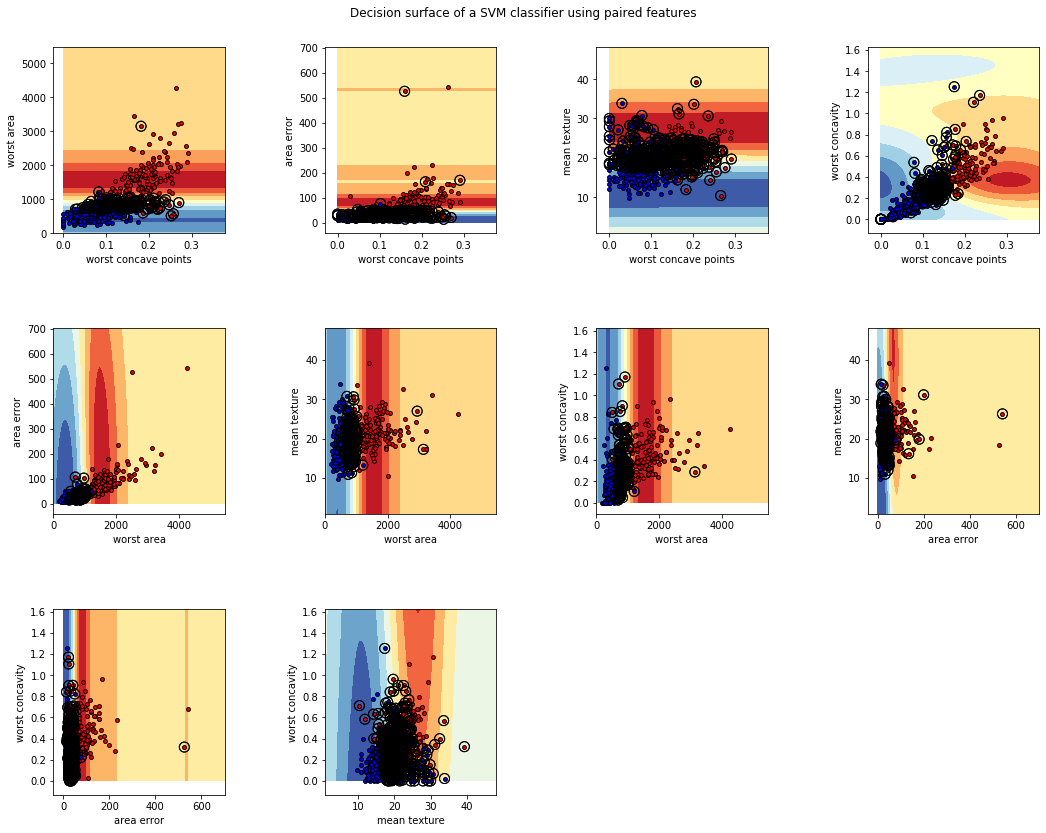

In [41]:
# Reference: https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html, 
# https://scikit-learn.org/stable/auto_examples/svm/plot_linearsvc_support_vectors.html
# https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html#sphx-glr-auto-examples-svm-plot-iris-svc-py

plt.figure(figsize=(16,16))
for pairidx, pair in enumerate(list(combinations(top_features, 2))):
    # We only take the two corresponding features
    X = df.loc[:, pair]
    y = df.target

    # Train
    clf = SVC().fit(X, y)

    # Plot the decision boundary
    plt.subplot(4, 4, pairidx + 1)

    # calculate the axis margins
    x_min, x_max = X.loc[:, pair[0]].min(), X.loc[:, pair[0]].max()
    y_min, y_max = X.loc[:, pair[1]].min(), X.loc[:, pair[1]].max()
    x_min, x_max = 0 if x_min - (x_max-x_min) * 0.3 < 0 else x_min - (x_max-x_min) * 0.3, x_max + (x_max-x_min) * 0.3
    y_min, y_max = 0 if y_min - (y_max-y_min) * 0.3 < 0 else y_min - (y_max-y_min) * 0.3, y_max + (y_max-y_min) * 0.3
    xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max - x_min)/600),
                         np.arange(y_min, y_max, (y_max - y_min)/600))

    plt.tight_layout(pad=6)

    # calculate decision boundary
    #Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    
    # calculate support vectors
    decision_function = clf.decision_function(X)
    support_vector_indices = np.where((2 * y - 1) * decision_function <= 1)[0]
    support_vectors = X.loc[list(support_vector_indices), :]

    # Plot the training points
    for i, color in zip(range(2), "rb"):
        idx = list(np.where(y == i)[0])
        plt.scatter(X.loc[idx, pair[0]], X.loc[idx, pair[1]], c=color, label=pair[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
        # plot support vectors
        plt.scatter(support_vectors.loc[:, pair[0]], support_vectors.loc[:, pair[1]], s=100,
                    linewidth=1, facecolors='none', edgecolors='k')

plt.suptitle("Decision surface of a SVM classifier using paired features")
# plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
# plt.tight_layout()

plt.show()

## Q 5.3
### Answer:

- These support vectors actually composited with the nearest points of hyper-plane,which means they "support" the separating classification of the hyper-plane.

- We can see from the diagrams that the support vectors live on (or near) the decision functions (support vectors are circled). The decision function for an SVM is fully specified by a (usually small) subset of the data which defines the position of the separator. These points are referred to as the support vectors. Intuitively, if we maximise the margin between the data points and the decision boundary, we can allow more unseen data to be correctly classified when they are close to the decision boundary.

# Q 6

## Q 6.1
### Answer:

- Both SVM and decision tree classifiers can be used for classifying non-linearly separable data. However, SVM need to use non-linear kernel in order to generate non-linear hyperplanes, in other words, SVM can map the data into higher dimension using non-linear kernel in order to get linear separable data. Tree based method will generate a stair case pattern decision boundaries to separate the data whereas SVM using a radial kernel will generate elliptical shape decision boudaries. In this study, SVM method is more accurate than the DT method.

- When classifying samples far away from the dense sampling areas, both SVM (radial kernel) and decision tree classifiers will try to adjust the decision boudaries in order to achieve higher accuracy, however, this may lead to overfitting. We can reduce the depth of the decision tree and reduce the "gamma" together with "C" parameters for SVM (radial kernel) in order to generalise the model. For SVM with linear kernels, since the decision boundary is linear, the "outliers" will always live in one side of the boundary.


## Q 6.2
### Answer:

- Bias Error: 
  * Bias is the difference between the average prediction of our model and the correct value which we are trying to predict. Model with high bias pays very little attention to the training data and oversimplifies the model.[2]
  * We can use a 10 fold cross validation to test decision tree and svm classifiers, from the following results, we can see that overall svm performs better than decision tree classifier, which means svm has less bias error than decision tree. Since decision tree use condition branch to classify data, the decision boundary is less smooth than SVM's decision boundary, so that SVM can be more flexible and can classify data more accurately. SVM is also called "large margin classifier", which tries to build a decision boundary that maximise the distance between two classes, so that it can get "extra" benefit to correctly classify those points that live near the decision boundary.


- Variance Error: 
  * Variance is the variability of model prediction for a given data point or a value which tells us spread of our data. Model with high variance pays a lot of attention to training data and does not generalize on the data which it hasn’t seen before. As a result, such models perform very well on training data but has high error rates on test data.[3] 
  * We can see that both models introduce some variance error, since the scores fluctuates for the 10 fold cross validation. Decision tree classifier tends to fluctuates more seriously than SVM classifier, which means decision tree classifier is slightly overfit the data more than SVM. The reason behind this is that decision tree is sensitive to data distribution and it is hard to generalise the data well. One way to mitigate this is to bootstrap samples from dataset and grow multiple trees and combine them in order to perform classification, which is called random forest classifier.

[2],[3] Singh, 2018, https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229,

In [42]:
from sklearn.model_selection import cross_validate


clf_dt = DecisionTreeClassifier(random_state=0,
                             criterion='gini',
                             max_depth=4,
                             min_samples_leaf=3,
                             min_samples_split=2,
                             min_weight_fraction_leaf=0.0,
                             max_features=None,
                             max_leaf_nodes=None, 
                             min_impurity_decrease=0.0, 
                             min_impurity_split=None,
                             class_weight=None)

scores = cross_validate(clf_dt, df.loc[:, 'mean radius':'worst fractal dimension'], df['target'], cv=10, scoring=["accuracy", "precision", "recall"])
scores.pop("fit_time")
scores.pop("score_time")
plot_scores = pd.DataFrame(scores)
plot_scores

,test_accuracy,test_precision,test_recall
0,0.929825,0.969697,0.914286
1,0.842105,0.842105,0.914286
2,0.912281,0.918919,0.944444
3,0.859649,0.911765,0.861111
4,0.929825,0.944444,0.944444
5,0.912281,0.918919,0.944444
6,0.894737,0.875000,0.972222
7,0.912281,0.918919,0.944444
8,0.912281,1.000000,0.861111
9,1.000000,1.000000,1.000000


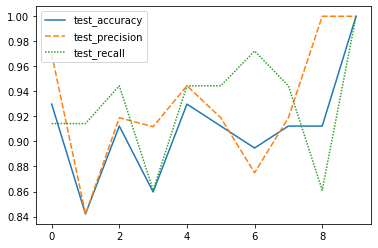

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.lineplot(data=plot_scores)

In [44]:
clf = SVC(C=10, 
          kernel='rbf',
          gamma=0.01, 
          tol=0.001, 
          class_weight=None, 
          max_iter=-1)

# build the pipeline
steps = [('scaler', StandardScaler()), ('svm', clf)]
pipeline = Pipeline(steps)

scores = cross_validate(pipeline, df.loc[:, 'mean radius':'worst fractal dimension'], df['target'], cv=10, scoring=["accuracy", "precision", "recall"])
scores.pop("fit_time")
scores.pop("score_time")
plot_scores = pd.DataFrame(scores)
plot_scores

,test_accuracy,test_precision,test_recall
0,1.000000,1.000000,1.000000
1,0.982456,0.972222,1.000000
2,0.964912,0.947368,1.000000
3,0.982456,0.972973,1.000000
4,0.982456,0.972973,1.000000
5,0.982456,0.972973,1.000000
6,0.929825,0.921053,0.972222
7,1.000000,1.000000,1.000000
8,1.000000,1.000000,1.000000
9,0.964286,0.971429,0.971429


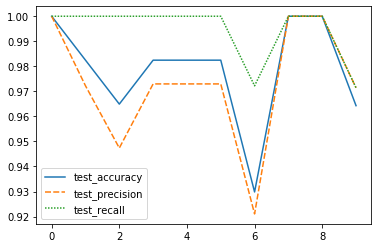

In [45]:
ax = sns.lineplot(data=plot_scores)

## Q 6.3
### Answer:

- In our decision tree classifier, we have used 8 features rather than 4 features and achieve 96% accuracy for the testing data (sample 30% from original dataset) compare to 86.3% accuracy (maximum) in the table. We have a similar feature selection, we both selected 'mean texture', 'worst area', 'worst concavity' these 3 features except for 'worse fractal dimension'. 

In [46]:
clf_dt = DecisionTreeClassifier(random_state=0,
                             criterion='gini',
                             max_depth=4,
                             min_samples_leaf=3,
                             min_samples_split=2,
                             min_weight_fraction_leaf=0.0,
                             max_features=None,
                             max_leaf_nodes=None, 
                             min_impurity_decrease=0.0, 
                             min_impurity_split=None,
                             class_weight=None)
clf_dt.fit(df.loc[:, 'mean radius':'worst fractal dimension'], df['target'])
sorted(
    list(
        zip(clf_dt.feature_importances_, data.feature_names)), key=lambda x: x[0], reverse=True)

[(0.7424208709893986, 'worst radius'),
 (0.11430664020301286, 'worst concave points'),
 (0.04334652256138945, 'mean concave points'),
 (0.04117997952116583, 'worst texture'),
 (0.03330841878785443, 'mean texture'),
 (0.013166588960537488, 'worst area'),
 (0.006233845016308489, 'worst concavity'),
 (0.00603713396033271, 'radius error'),
 (0.0, 'mean radius'),
 (0.0, 'mean perimeter'),
 (0.0, 'mean area'),
 (0.0, 'mean smoothness'),
 (0.0, 'mean compactness'),
 (0.0, 'mean concavity'),
 (0.0, 'mean symmetry'),
 (0.0, 'mean fractal dimension'),
 (0.0, 'texture error'),
 (0.0, 'perimeter error'),
 (0.0, 'area error'),
 (0.0, 'smoothness error'),
 (0.0, 'compactness error'),
 (0.0, 'concavity error'),
 (0.0, 'concave points error'),
 (0.0, 'symmetry error'),
 (0.0, 'fractal dimension error'),
 (0.0, 'worst perimeter'),
 (0.0, 'worst smoothness'),
 (0.0, 'worst compactness'),
 (0.0, 'worst symmetry'),
 (0.0, 'worst fractal dimension')]